In [1]:
import sys
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
clust_col_labels = ["protein", "sodium"]
nb_clusters = 3
disp_col_labels = ["protein", "sodium"]

In [3]:
data = pd.read_csv("../csv/cereals.csv", index_col=0, delimiter='\t')
if not clust_col_labels[0].startswith(':'):
    data = data.loc[:,clust_col_labels]
    print("Selected labels: " + str(clust_col_labels))
print('Read in the (' + str(data.shape[0]) + ',' + str(data.shape[1]) + ') data:')
data

Selected labels: ['protein', 'sodium']
Read in the (77,2) data:


,protein,sodium
name,,
100%_Bran,4,130
100%_Natural_Bran,3,15
All-Bran,4,260
All-Bran_with_Extra_Fiber,4,140
Almond_Delight,2,200
...,...,...
Triples,2,250
Trix,1,140
Wheat_Chex,3,230


In [5]:
print("\nMin-max normalizing data...", end='')
scaler = MinMaxScaler()
ndata = scaler.fit_transform(data)
ndata[:10]


Min-max normalizing data...

array([[0.6     , 0.40625 ],
       [0.4     , 0.046875],
       [0.6     , 0.8125  ],
       [0.6     , 0.4375  ],
       [0.2     , 0.625   ],
       [0.2     , 0.5625  ],
       [0.2     , 0.390625],
       [0.4     , 0.65625 ],
       [0.2     , 0.625   ],
       [0.4     , 0.65625 ]])

In [8]:
cl = KMeans(n_clusters=nb_clusters, random_state=0, n_init='auto').fit(data)

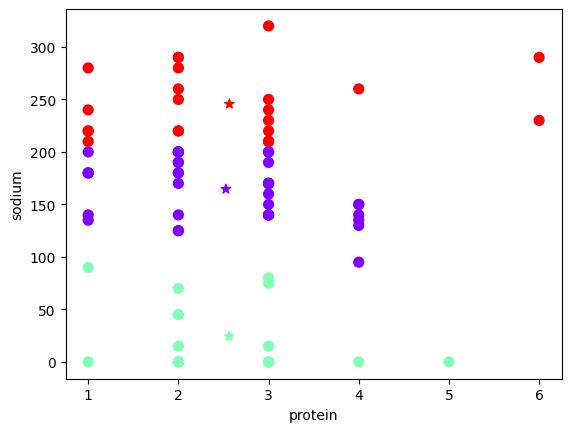

In [9]:
data.plot(kind="scatter", x=disp_col_labels[0], y=disp_col_labels[1], c=cl.labels_, marker='o', s=50, colormap=plt.cm.rainbow, colorbar=False, legend=True)
#centers = scaler.inverse_transform(cl.cluster_centers_)
centers = cl.cluster_centers_
x = data.columns.get_loc(disp_col_labels[0])
y = data.columns.get_loc(disp_col_labels[1])
plt.scatter(centers[:,x], centers[:,y], c=list(range(nb_clusters)), marker='*', s=50, cmap=plt.cm.rainbow)